# COVID-19 Modeling

In [1]:
%pylab inline
from numpy import *
from math import *
from scipy.optimize import fixed_point as fp
from IPython.display import Image
from IPython.core.display import HTML 

Populating the interactive namespace from numpy and matplotlib


The SIR model, which is a popular model for simulating epidemics, can be used to predict the number of susceptible S, the number of infected I, and the number of recovered R.

#### $$ \begin{cases}  \frac{dS}{dt} = -\beta IS  \\ \frac{dI}{dt} = \beta IS - \gamma I \\ \frac{dR}{dt} = \gamma I \end{cases} $$

## SIR Model

In [2]:
def simulate_SIR(gamma,beta,T,dt,y0):
    #T= timesteps
    y = zeros((len(T),3))   # row i contains y_i
    y[0] = y0               # initial condition
    for t in range(len(T)-1):
        S = y[t,0]
        I = y[t,1]
        R = y[t,2]
        # Forward Euler
        f1 = -beta*I*S              #dS/dt
        f2 = beta*I*S - gamma*I     #dI/dt
        f3 = gamma*I                #dR/dt
        S = S + dt*f1               #S(t)
        I = I + dt*f2               #I(t)
        R = R + dt*f3               #R(t)
        y[t+1] = [S,I,R]      
    return y

def plot_SIR(ti,y,ax):
    ax.plot(ti,y[:,0], 'y')
    ax.plot(ti,y[:,1], 'r')
    ax.plot(ti,y[:,2], 'b')
    ax.set_title('S(t), I(t), R(t)')
    ax.legend(['Susceptible, S','Infected, I', 'Recovered, R'])
    ax.set_xlabel('time, t')
    ax.set_ylabel('level of infection') 
    

### Infection Rate beta = 0.6

Text(0, 0.5, 'level of infection')

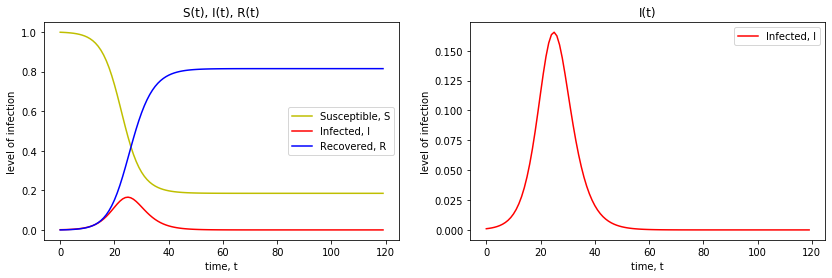

In [3]:
beta = .6    #infection rate
gamma = 0.3  #recovery rate
T = range(0,120,1)  #time steps
y0 = [0.999,0.001,0] # initial condition
dt = 1   #time step
y = simulate_SIR(gamma,beta,T,dt,y0)
fig,ax = plt.subplots(1,2,figsize=(14,4))
plot_SIR(T,y,ax[0])

#plot for just I(t)
ax[1].plot(T,y[:,1], 'r')
ax[1].legend(['Infected, I'])
ax[1].set_title('I(t)')
ax[1].legend(['Infected, I'])
ax[1].set_xlabel('time, t')
ax[1].set_ylabel('level of infection') 

### Infection Rate beta = 0.6

Text(0, 0.5, 'level of infection')

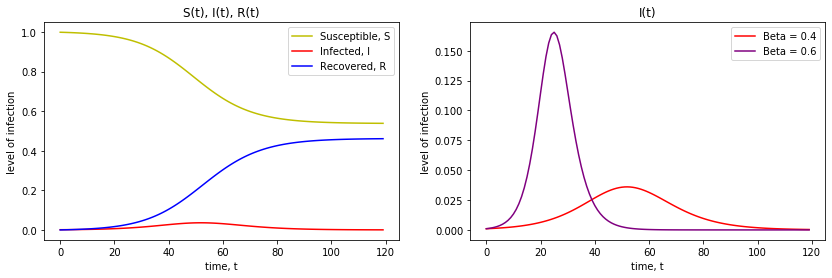

In [4]:
beta = .4
y = simulate_SIR(gamma,beta,T,dt,y0)
fig,ax = plt.subplots(1,2,figsize=(14,4))
plot_SIR(T,y,ax[0])
 
#graph for just I with beta = 0.4, 0.6
beta1 = .6
y1 = simulate_SIR(gamma,beta1,T,dt,y0)
ax[1].plot(T,y[:,1],'r')
ax[1].plot(T,y1[:,1],'purple')
ax[1].legend(['Beta = 0.4', 'Beta = 0.6'])
ax[1].set_title('I(t)')
ax[1].set_xlabel('time, t')
ax[1].set_ylabel('level of infection') 

Text(0, 0.5, 'level of infection')

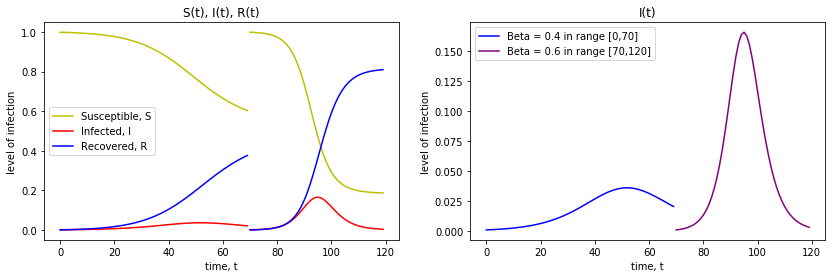

In [5]:
# beta = 0.4 in range [0,70]
beta = .4 
T1 = range(0,70,1)  #time steps for 0 - 70
y1 = simulate_SIR(gamma,beta,T1,dt,y0)
fig,ax = plt.subplots(1,2,figsize=(14,4))
plot_SIR(T1,y1,ax[0])

#beta=0.6 in range [70,120] 
betaq = .6
T2 = range(70,120,1)  #timesteps for 70-120
y2 = simulate_SIR(gamma,beta1,T2,dt,y0)
plot_SIR(T2,y2,ax[0])


#beta=0.4 in range [0,70] Infected only plot
ax[1].plot(T1,y1[:,1],'b')

#beta=0.6 in range [70,120] Infected only plot
ax[1].plot(T2,y2[:,1],'purple')



ax[1].legend(['Beta = 0.4 in range [0,70]', 'Beta = 0.6 in range [70,120]'])
ax[1].set_title('I(t)')
ax[1].set_xlabel('time, t')
ax[1].set_ylabel('level of infection') 

For the graph on the left we have beta=0.4 from [0,70] and beta=0.6 from [70,120] for S(t), I(t), R(t).
For the graph on the right, we have beta=0.4 from [0,70] and beta=0.6 from [70,120] just for I(t)

## SIRD Model

I will be modeling a SIRD Model (Susceptible-Infectious-Recovered-Deceased-Model). In this model, rates of infection, recovery, and mortality are respectively: $${\displaystyle \beta ,\gamma ,\mu }$$

#### $$ \begin{cases}  \frac{dS}{dt} = -\beta I(t)S(t)  \\ \frac{dI}{dt} = \beta I(t)S(t) - \gamma I(t) - \mu I(t)\\ \frac{dR}{dt} = \gamma I(t) \\ \frac{dD}{dt} = \mu I(t) \end{cases} $$

In [6]:
def simulate_SIRD(gamma,beta, mu,T,dt,y0):
    #T= timesteps
    y = zeros((len(T),4))  # row i contains y_i
    y[0] = y0              # initial condition

    for t in range(len(T)-1):
        S = y[t,0]
        I = y[t,1]
        R = y[t,2]
        D = y[t,3]
        
        # Forward Euler
        f1 = -beta*I*S #dS/dt
        f2 = beta*I*S - gamma*I-mu*I #dI/dt
        f3 = gamma*I #dR/dt
        f4 = mu*I #dD/dt
        S = S + dt*f1  #S(t)
        I = I + dt*f2   #I(t)
        R = R + dt*f3   #R(t)
        D= D+ dt*f4     #D(t)
        y[t+1] = [S,I,R,D]  
        
    return y

#Used plot methods from Chapter 6 as well, modified to work with additonal plot

def plot_SIRD(ti,y,ax):
    ax.plot(ti,y[:,0], 'y')
    ax.plot(ti,y[:,1], 'r')
    ax.plot(ti,y[:,2], 'b')
    ax.plot(ti,y[:,3],  'black')
    ax.set_title('S(t), I(t), R(t), D(t)')
    ax.legend(['Susceptible, S','Infected, I', 'Recovered, R', 'Deceased, D'])
    ax.set_xlabel('time, t')
    ax.set_ylabel('level of infection') 

Text(0, 0.5, 'level of infection')

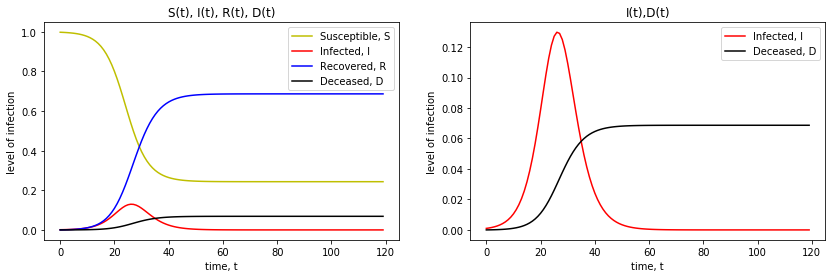

In [7]:
beta = .6    #infection rate
gamma = 0.3  #recovery rate
mu = 0.03 #mortality rate
T = range(0,120,1)  
y0 = [0.998,0.001,0,0]
dt = 1
y = simulate_SIRD(gamma,beta,mu,T,dt,y0)
fig,ax = plt.subplots(1,2,figsize=(14,4))
plot_SIRD(T,y,ax[0])

#plot for just I(t)
ax[1].plot(T,y[:,1], 'r')
ax[1].plot(T,y[:,3], 'black')
ax[1].legend(['Infected, I', 'Deceased, D'])
ax[1].set_title('I(t),D(t)')
ax[1].set_xlabel('time, t')
ax[1].set_ylabel('level of infection')

## Graphing and Predicting Cases

In [8]:
import pandas as pd
df = pd.read_csv('time_series_covid19_confirmed_US.csv')
df = df.set_index('Combined_Key') #df.loc[0] # show the data frame
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"American Samoa, US",16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
"Guam, US",316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,141,141,145,145,145,145,145,145,149,149
"Northern Mariana Islands, US",580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,14,14,14,14,15,15
"Puerto Rico, US",630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031
"Virgin Islands, US",850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,57,57,66,66,66,66,66,66,66,66


In [9]:
# given a a state, this function returns the names of counties and the numbers of infection persons in those counties over time
def get_state_county_data(df,Province_State):
    County_Data = df.loc[df['Province_State'] == Province_State]
    cols_to_delete = ['UID', 'iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_']
    County_Data = County_Data.drop(columns=cols_to_delete)
    County_Names = County_Data.index
    County_Names = [ name.split(',')[0] for name in County_Names]
    infection_counts = County_Data.to_numpy()
    return County_Names,infection_counts

In [10]:
Province_State = 'New York'
county_names,county_data = get_state_county_data(df,Province_State);
# county_names contains the names of counties in NY
# county_data is a numpy matrix in which row t is the number of infections in county t

for i,county in enumerate(county_names):
    print(i,county)

0 Albany
1 Allegany
2 Bronx
3 Broome
4 Cattaraugus
5 Cayuga
6 Chautauqua
7 Chemung
8 Chenango
9 Clinton
10 Columbia
11 Cortland
12 Delaware
13 Dutchess
14 Erie
15 Essex
16 Franklin
17 Fulton
18 Genesee
19 Greene
20 Hamilton
21 Herkimer
22 Jefferson
23 Kings
24 Lewis
25 Livingston
26 Madison
27 Monroe
28 Montgomery
29 Nassau
30 New York City
31 Niagara
32 Oneida
33 Onondaga
34 Ontario
35 Orange
36 Orleans
37 Oswego
38 Otsego
39 Putnam
40 Queens
41 Rensselaer
42 Richmond
43 Rockland
44 St. Lawrence
45 Saratoga
46 Schenectady
47 Schoharie
48 Schuyler
49 Seneca
50 Steuben
51 Suffolk
52 Sullivan
53 Tioga
54 Tompkins
55 Ulster
56 Warren
57 Washington
58 Wayne
59 Westchester
60 Wyoming
61 Yates
62 Out of NY
63 Unassigned


In [11]:
print(county_names[14],'\n',county_data[14])

Erie 
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    3    3    7   11
   20   28   47   50   56   87  114  122  206  245  318  414  443  499
  582  617  734  808 1059 1148 1234 1335 1432 1498 1506 1571 1661 1730
 1812 1951 2023 2023 2192 2192 2284 2284 2450 2603 2773 2954 3021 3089
 3196 3319 3481 3598 3710 3802 3891 4008 4136]


### Let's plot the running totals of infections vs time for every NY county

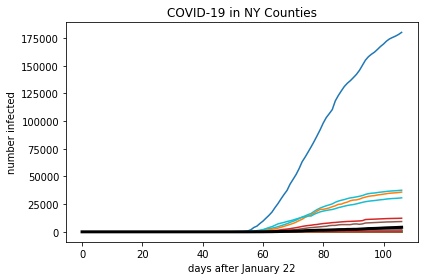

In [12]:
for i in range(len(county_data)):
    plt.plot(county_data[i]);
    
plt.plot(county_data[14],'k',linewidth=3);

#plt.legend(county_names)
plt.xlabel('days after January 22')
plt.ylabel('number infected');    
plt.title('COVID-19 in NY Counties');
plt.tight_layout()
savefig('counties.pdf')

## Erie County

[ 79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106]
[1498 1506 1571 1661 1730 1812 1951 2023 2023 2192 2192 2284 2284 2450
 2603 2773 2954 3021 3089 3196 3319 3481 3598 3710 3802 3891 4008 4136]


Text(0.5, 1.0, 'Erie County COVID-19 Cases')

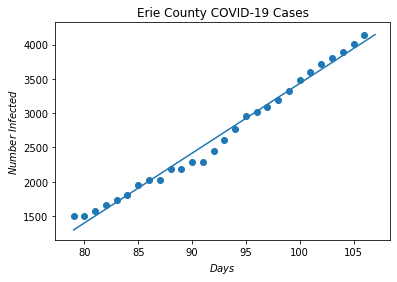

In [13]:
#We can reuse our method of least squares from earlier, just have to change some of the numbers
xi_s=array(arange(79,107,1))   # array of numbers from 79-107
yi_s=county_data[14]           #Erie County data
yi_s=yi_s[79:]                  # 28 days of data

print(xi_s) #checking data
print(yi_s) #checking data

X = array([ones(28),xi_s]).T
a = linalg.solve(dot(X.T,X), dot(X.T,yi_s))  # solve for x times its tranpose and x tranpose times yi_s

x_plot = linspace(79,107,28) #Set the xplot based on the limits of x_s
plt.plot(x_plot,a[0]+ a[1]*x_plot)
plt.scatter(xi_s,yi_s);
plt.xlabel('$Days$')
plt.ylabel('$Number$ $Infected$');
plt.title('Erie County COVID-19 Cases')

### Prediction for next 7 days for Erie County

In [14]:
t=linspace(108,114,7)   #7 days after 
print(len(t)) 
a[0]+ a[1]*t 

7


array([4246.33880679, 4348.04269294, 4449.74657909, 4551.45046524,
       4653.1543514 , 4754.85823755, 4856.5621237 ])

## New York City

Text(0.5, 1.0, 'New York City COVID-19 Cases')

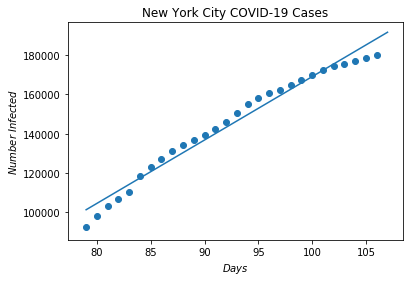

In [15]:
xi_s=array(arange(79,107,1))   # array of numbers from 79-107
yi_s=county_data[30]           #New York City  data
yi_s=yi_s[79:]                 #data from last 28 days till May 7


X = array([ones(28),xi_s]).T  #array of ones combined with xi_s, then tranposed
a = linalg.solve(dot(X.T,X), dot(X.T,yi_s))  # solve for x times its tranpose and x tranpose times yi_s

x_plot = linspace(79,107,7) #Set the xplot based on the limits of x_s
plt.plot(x_plot,a[0]+ a[1]*x_plot)
plt.scatter(xi_s,yi_s);
plt.xlabel('$Days$')
plt.ylabel('$Number$ $Infected$');
plt.title('New York City COVID-19 Cases')

### Prediction for next 7 days for Erie County


In [16]:
t=linspace(108,114,7)   #7 days after 
print(len(t)) 
a[0]+ a[1]*t 

7


array([194878.06048166, 198105.20032841, 201332.34017515, 204559.48002189,
       207786.61986864, 211013.75971538, 214240.89956212])

# Sources:

* Some code provided in MTH 437